In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import json
import openpyxl

with open('covid_states_daily.json', 'r') as f:
    covid_data_dict = json.load(f)
    covid_data_list = covid_data_dict['states_daily']
    covid_data = pd.json_normalize(covid_data_list)
    covid_data

In [100]:
covid_data.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [101]:
covid_data_confirmed = covid_data[covid_data.status == 'Confirmed']
covid_data_confirmed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 521 entries, 0 to 1560
Data columns (total 42 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   an       521 non-null    object
 1   ap       521 non-null    object
 2   ar       521 non-null    object
 3   as       521 non-null    object
 4   br       521 non-null    object
 5   ch       521 non-null    object
 6   ct       521 non-null    object
 7   date     521 non-null    object
 8   dateymd  521 non-null    object
 9   dd       521 non-null    object
 10  dl       521 non-null    object
 11  dn       521 non-null    object
 12  ga       521 non-null    object
 13  gj       521 non-null    object
 14  hp       521 non-null    object
 15  hr       521 non-null    object
 16  jh       521 non-null    object
 17  jk       521 non-null    object
 18  ka       521 non-null    object
 19  kl       521 non-null    object
 20  la       521 non-null    object
 21  ld       521 non-null    object
 22  mh    

In [102]:
covid_data_confirmed.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
6,0,0,0,0,0,0,0,16-Mar-20,2020-03-16,0,...,0,Confirmed,1,0,0,15,0,0,1,0
9,0,0,0,0,0,0,0,17-Mar-20,2020-03-17,0,...,0,Confirmed,1,0,0,11,0,2,0,1
12,0,0,0,0,0,0,0,18-Mar-20,2020-03-18,0,...,0,Confirmed,8,1,0,37,0,2,1,0


Exporting data of a random state to excel

In [161]:
cases_an_confirmed = covid_data_confirmed.an.astype(int)
print(type(cases_an_confirmed))


<class 'pandas.core.series.Series'>


In [104]:
cases_an_confirmed.to_excel('an_confirmed.xlsx', index = False)

ANALYZING RELATIONSHIP BETWEEN CONFIRMED AND RECOVERED CASES OF A RANDOM STATE

In [105]:
covid_data_recovered = covid_data[covid_data.status == 'Recovered']

In [106]:
#Relationship between confirmed and recovered cases of state AP.

cases_ap_confirmed = covid_data_confirmed.ap.astype(int)

cases_ap_recovered = covid_data_recovered.ap.astype(int)

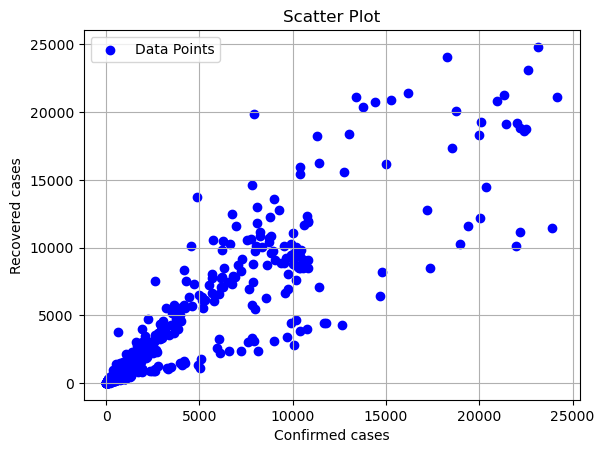

In [160]:
#Scatter plotting to find relationship

x = list(covid_data_confirmed.ap.astype(int))
y = list(covid_data_recovered.ap.astype(int))


plt.scatter(x, y, c = 'blue', marker = 'o', label = 'Data Points')

# Add labels and title
plt.xlabel('Confirmed cases')
plt.ylabel('Recovered cases')
plt.title('Scatter Plot')

# Add a legend
plt.legend()

# Display the scatter plot
plt.grid(True)
plt.show()




CHECKING RELATIONSHIP BETWEEN OVERALL CONFIRMED AND RECOVERED CASES IN INDIA

In [109]:
covid_data_new = covid_data.set_index('dateymd').drop(columns = 'date')
covid_data_new

,an,ap,ar,as,br,ch,ct,dd,dl,dn,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
dateymd,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,...,0,Confirmed,1,1,0,81,0,12,0,0
2020-03-14,0,0,0,0,0,0,0,0,1,0,...,0,Recovered,0,0,0,9,0,4,0,0
2020-03-14,0,0,0,0,0,0,0,0,1,0,...,0,Deceased,0,0,0,2,0,0,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
2020-03-15,0,0,0,0,0,0,0,0,1,0,...,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-15,2,1835,255,857,38,1,114,0,18,0,...,213,Recovered,582,1842,253,35936,0,36,31,709
2021-08-15,0,16,0,10,0,0,1,0,0,0,...,0,Deceased,1,23,4,421,0,1,0,12
2021-08-16,1,909,165,758,14,2,68,0,27,2,...,20,Confirmed,405,1851,52,24696,0,17,18,502


In [128]:
covid_data_confirmed['dateymd'] = pd.to_datetime(covid_data_confirmed['dateymd'])
covid_data_confirmed_new = covid_data_confirmed.set_index('dateymd').drop(columns = ['date','status'])
covid_data_confirmed_new

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14700\1602879303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_confirmed['dateymd'] = pd.to_datetime(covid_data_confirmed['dateymd'])


,an,ap,ar,as,br,ch,ct,dd,dl,dn,...,rj,sk,tg,tn,tr,tt,un,up,ut,wb
dateymd,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,...,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,...,3,0,8,1,0,37,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-12,0,1859,180,935,43,12,98,0,49,1,...,17,100,453,1942,140,40081,0,15,24,747
2021-08-13,0,1746,166,763,47,15,77,0,50,0,...,24,150,427,1933,180,38761,0,25,27,739
2021-08-14,0,1535,161,755,39,4,83,0,50,0,...,14,129,420,1916,137,36135,0,42,19,705


In [125]:
covid_data_recovered['dateymd'] = pd.to_datetime(covid_data_recovered['dateymd'])
covid_data_recovered_new = covid_data_recovered.set_index('dateymd').drop(columns = ['date', 'status'])
covid_data_recovered_new

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14700\700357328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_recovered['dateymd'] = pd.to_datetime(covid_data_recovered['dateymd'])


,an,ap,ar,as,br,ch,ct,dd,dl,dn,...,rj,sk,tg,tn,tr,tt,un,up,ut,wb
dateymd,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,9,0,4,0,0
2020-03-15,0,0,0,0,0,0,0,0,1,0,...,2,0,1,0,0,4,0,0,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2020-03-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2020-03-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-12,0,1575,273,1310,47,10,146,0,41,0,...,18,244,591,1892,153,42156,0,26,37,773
2021-08-13,2,1648,271,1169,53,10,163,0,84,1,...,13,202,609,1887,288,35759,0,44,40,749
2021-08-14,2,2075,323,969,52,2,144,0,39,1,...,11,217,623,1866,264,37936,0,64,24,721


In [129]:
covid_data_confirmed_new = covid_data_confirmed_new.apply(pd.to_numeric, errors='coerce') #converting cell values to numeric
covid_data_confirmed_new['confirmed_total'] = covid_data_confirmed_new.sum(axis = 1, numeric_only=True) #aggregating values by row
covid_data_confirmed_new

,an,ap,ar,as,br,ch,ct,dd,dl,dn,...,sk,tg,tn,tr,tt,un,up,ut,wb,confirmed_total
dateymd,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,...,0,1,1,0,81,0,12,0,0,162
2020-03-15,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,27,0,1,0,0,54
2020-03-16,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,15,0,0,1,0,30
2020-03-17,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,11,0,2,0,1,22
2020-03-18,0,0,0,0,0,0,0,0,2,0,...,0,8,1,0,37,0,2,1,0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-12,0,1859,180,935,43,12,98,0,49,1,...,100,453,1942,140,40081,0,15,24,747,80162
2021-08-13,0,1746,166,763,47,15,77,0,50,0,...,150,427,1933,180,38761,0,25,27,739,77522
2021-08-14,0,1535,161,755,39,4,83,0,50,0,...,129,420,1916,137,36135,0,42,19,705,72270


In [130]:
covid_data_recovered_new = covid_data_recovered_new.apply(pd.to_numeric, errors = 'coerce')
covid_data_recovered_new['recovered_total'] = covid_data_recovered_new.sum(axis=1, numeric_only=True)
covid_data_recovered_new.recovered_total.max()

844782

<function matplotlib.pyplot.show(close=None, block=None)>

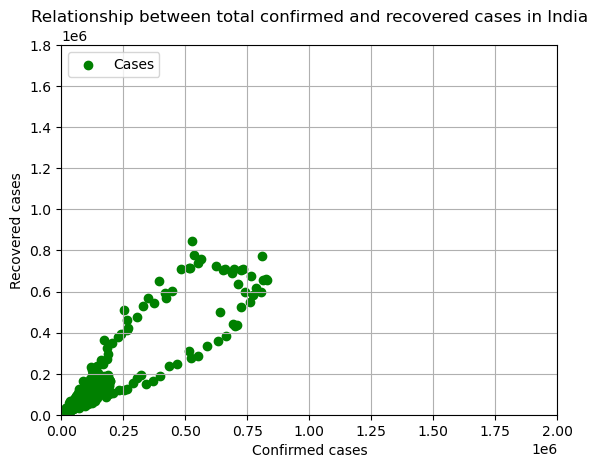

In [114]:
m = list(covid_data_confirmed_new.confirmed_total.astype(int))
n = list(covid_data_recovered_new.recovered_total.astype(int))

plt.xlabel('Confirmed cases')
plt.ylabel('Recovered cases')
plt.title('Scatter Plot')
plt.xlim(0,2000000)
plt.ylim(0,1800000)

# Add a legend

plt.scatter(m, n, c = 'Green', marker = 'o', label = 'Cases')
plt.title('Relationship between total confirmed and recovered cases in India')

plt.legend(loc = 'upper left')
plt.grid(True)
plt.show

OBSERVING THE DAILY CONFIRMED AND RECOVERED COVID-19 CASES IN INDIA...

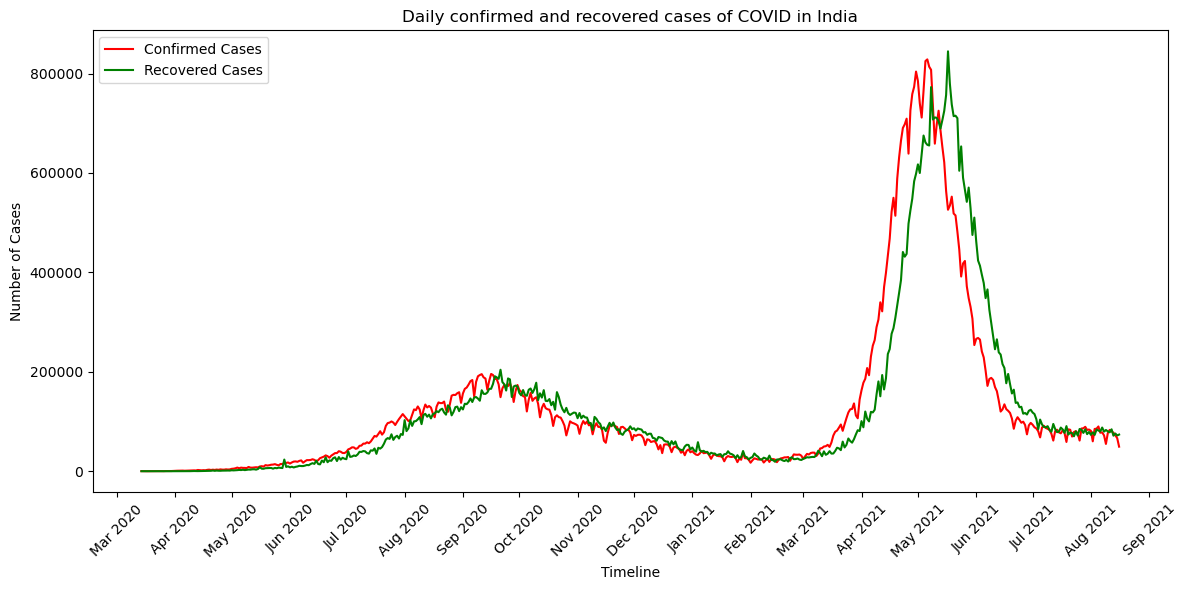

In [138]:
import matplotlib.dates as mdates

j = list(covid_data_confirmed_new.confirmed_total.astype(int))
k = list(covid_data_recovered_new.recovered_total.astype(int))

dates = covid_data_confirmed_new.index

plt.figure(figsize = (12,6))

plt.plot(dates, j, label = 'Confirmed Cases', color = 'red')
plt.plot(dates, k, label = 'Recovered Cases', color = 'green')

plt.xlabel('Timeline')
plt.ylabel('Number of Cases')
plt.title('Daily confirmed and recovered cases of COVID in India')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.legend(loc = 'upper left')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

PREDICTING THE CONFIRMED CASES FOR THE NEXT 30 DAYS BASED ON THE PRESENT OCCURENCES BASED ON A SIMPLE LINEAR REGRESSION MODEL

In [177]:
def m_avg(values):
    return sum(values)/len(values)

def best_fit_line(x,y):
    n = len(x)
    x_mean = m_avg(x)
    y_mean = m_avg(y)
    

    num = sum((x[i] - x_mean)*(y[i] - y_mean) for i in range (n))
    den = sum((x[i] - x_mean)**2 for i in range (n))
    m = num/den

    c = y_mean - m*x_mean

    return m, c


present_confirmed_cases = list(covid_data_confirmed_new['confirmed_total'])
present_timeline = list(covid_data_confirmed_new.index)

reference_date = present_timeline[0]

x_values = [(date - reference_date).days for date in present_timeline]


m1, c1 = best_fit_line(x_values, present_confirmed_cases)

prediction_timeline = list(range(1,31))

predicted_cases = [round(m1*i + c1) for i in range(1,31)]
print(predicted_cases)


    

[1917, 2387, 2858, 3328, 3799, 4270, 4740, 5211, 5681, 6152, 6622, 7093, 7564, 8034, 8505, 8975, 9446, 9916, 10387, 10858, 11328, 11799, 12269, 12740, 13211, 13681, 14152, 14622, 15093, 15563]


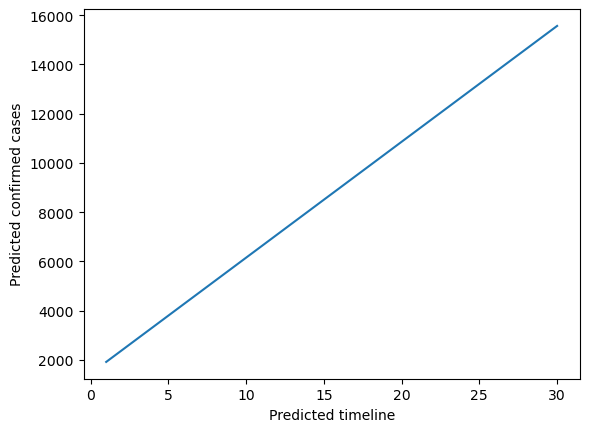

In [182]:
plt.plot(prediction_timeline, predicted_cases)

plt.xlabel('Predicted timeline')
plt.ylabel('Predicted confirmed cases')
plt.show()